In [294]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit
MAX_SENTENCE_LENGTH = 400
import nltk
import numpy as np
import torch
from torch.utils.data import Dataset
from nltk.stem.porter import *

In [250]:
stop_words = ["i","i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","to","from","up","down","in","on","off","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","other","some","such","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"]

In [251]:
import spacy
tokenize = spacy.load('en_core_web_sm')
stemmer = PorterStemmer()


In [252]:
import torch
print(torch.__version__)

0.4.1


In [253]:
path_train_pos = "/home/cvh255/nlp_hw1/aclImdb/train/pos/"
path_train_neg = "/home/cvh255/nlp_hw1/aclImdb/train/neg/"

In [254]:
train_pos_files = os.listdir(path_train_pos)
for f in range(len(train_pos_files)):
    train_pos_files[f] = path_train_pos + train_pos_files[f]

In [255]:
train_neg_files = os.listdir(path_train_neg)
for f in range(len(train_neg_files)):
    train_neg_files[f] = path_train_neg + train_neg_files[f]

In [256]:
train_pos_labels = [1]*len(train_pos_files)
train_neg_labels = [0]*len(train_neg_files)

In [257]:
df = pd.DataFrame(columns=["file_names","labels"])
df["file_names"] = train_pos_files+train_neg_files
df["labels"] = train_pos_labels+train_neg_labels

In [258]:
df.shape

(25000, 2)

In [259]:
df.head()

,file_names,labels
0,/home/cvh255/nlp_hw1/aclImdb/train/pos/9258_10...,1
1,/home/cvh255/nlp_hw1/aclImdb/train/pos/3_10.txt,1
2,/home/cvh255/nlp_hw1/aclImdb/train/pos/9597_10...,1
3,/home/cvh255/nlp_hw1/aclImdb/train/pos/3347_7.txt,1
4,/home/cvh255/nlp_hw1/aclImdb/train/pos/2160_8.txt,1


In [260]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(df["file_names"], df["labels"]):
    train_df = df.iloc[train_index]
    val_df = df.iloc[test_index]

In [261]:
train_df.shape,val_df.shape

((20000, 2), (5000, 2))

In [262]:
def get_data(df):
    all_txt = []
    for i,j in df.iterrows():
        f = open(j["file_names"])
        txt = f.read()
        all_txt.append(txt)
#         print(j)
    df["content"] = all_txt
    return df

In [263]:
train_df = get_data(train_df)
val_df = get_data(val_df)

/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [264]:
stemmer.stem("doing")

'do'

In [265]:
from nltk import ngrams

In [266]:
import string
punctuations = string.punctuation
def tokenize1(phrase):
    tokens = tokenize(phrase)
    return [stemmer.stem(token.text.lower()) for token in tokens if (token.text not in punctuations and token.text not in stop_words)]
    

In [267]:
bg = list(ngrams(tokenize1("I am going mad! you are nuts and mad again"),4))

In [268]:
bg

[('i', 'go', 'mad', 'nut'), ('go', 'mad', 'nut', 'mad')]

In [269]:
[' '.join(a) for a in bg]

['i go mad nut', 'go mad nut mad']

In [271]:
def tokenize_dataset1(dataset,n_gram):
    token_dataset = []
    all_tokens = []
    for sample in dataset:
        tokens = tokenize1(sample)
        bg = list(nltk.bigrams(tokens))
        tg = list(nltk.trigrams(tokens))
        fg = list(ngrams(tokens,4))
        bg_t = [' '.join(a) for a in bg]
        tg_t = [' '.join(a) for a in tg]
        fg_t = [' '.join(a) for a in fg]
        tokens = tokens + bg_t + tg_t + fg_t
        token_dataset.append(tokens)
        all_tokens+=tokens
    return token_dataset, all_tokens

In [272]:
print ("Tokenizing val data")
val_df["tokenized1"], _ = tokenize_dataset1(val_df["content"],1)
# pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_df["tokenized1"], all_train_tokens = tokenize_dataset1(train_df["content"],1)
# pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
# pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))

Tokenizing val data


/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Tokenizing train data


/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [295]:
train_df.head()

,file_names,labels,content,tokenized1,token_idized
8283,/home/cvh255/nlp_hw1/aclImdb/train/pos/4793_7.txt,1,After seeing this film I feel like I know just...,"[after, see, film, i, feel, like, i, know, lit...","[470, 19, 6, 2, 84, 11, 2, 51, 68, 155, 3733, ..."
10937,/home/cvh255/nlp_hw1/aclImdb/train/pos/11592_1...,1,"My son was 7 years old when he saw this movie,...","[my, son, 7, year, old, saw, movi, russian, fi...","[371, 429, 1384, 66, 97, 168, 5, 1848, 2563, 1..."
9347,/home/cvh255/nlp_hw1/aclImdb/train/pos/3243_8.txt,1,"Remember the early days of Pay Per View? I do,...","[rememb, earli, day, pay, per, view, i, almost...","[309, 402, 121, 709, 3957, 288, 2, 174, 309, 4..."
5430,/home/cvh255/nlp_hw1/aclImdb/train/pos/10129_7...,1,And that's how the greatest comedy of TV start...,"[and, 's, greatest, comedi, tv, start, it, 12,...","[70, 3, 907, 143, 204, 114, 12, 2445, 66, 201,..."
4072,/home/cvh255/nlp_hw1/aclImdb/train/pos/9873_7.txt,1,"Lily Mars, a smalltown girl living in Indiana,...","[lili, mar, smalltown, girl, live, indiana, dr...","[3279, 3930, 1, 119, 101, 9477, 564, 15, 150, ..."


In [296]:
train_df.to_csv("train_df_tok6.csv",index=False)

In [297]:
val_df.to_csv("val_df_tok6.csv",index=False)

In [298]:
import pickle
pickle.dump(all_train_tokens,open("all_tokens6",'wb'))

In [5]:
train_df = pd.read_csv("train_df_tok1.csv")
val_df = pd.read_csv("val_df_tok1.csv")

In [6]:
import pickle
all_train_tokens = pickle.load(open("all_tokens1",'rb'))

In [299]:
from collections import Counter

max_vocab_size = 100000
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [300]:
import random
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 39755 ; token written charact
Token written charact; token id 39755


In [301]:
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_df['token_idized'] = token2index_dataset(train_df['tokenized1'])
val_df['token_idized'] = token2index_dataset(val_df['tokenized1'])
# test_data_indices = token2index_dataset(test_data_tokens)



/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [302]:
train_df.head()

,file_names,labels,content,tokenized1,token_idized
8283,/home/cvh255/nlp_hw1/aclImdb/train/pos/4793_7.txt,1,After seeing this film I feel like I know just...,"[after, see, film, i, feel, like, i, know, lit...","[470, 19, 6, 2, 84, 11, 2, 51, 68, 155, 3733, ..."
10937,/home/cvh255/nlp_hw1/aclImdb/train/pos/11592_1...,1,"My son was 7 years old when he saw this movie,...","[my, son, 7, year, old, saw, movi, russian, fi...","[371, 429, 1384, 66, 97, 168, 5, 1848, 2563, 1..."
9347,/home/cvh255/nlp_hw1/aclImdb/train/pos/3243_8.txt,1,"Remember the early days of Pay Per View? I do,...","[rememb, earli, day, pay, per, view, i, almost...","[309, 402, 121, 709, 3957, 288, 2, 174, 309, 4..."
5430,/home/cvh255/nlp_hw1/aclImdb/train/pos/10129_7...,1,And that's how the greatest comedy of TV start...,"[and, 's, greatest, comedi, tv, start, it, 12,...","[70, 3, 907, 143, 204, 114, 12, 2445, 66, 201,..."
4072,/home/cvh255/nlp_hw1/aclImdb/train/pos/9873_7.txt,1,"Lily Mars, a smalltown girl living in Indiana,...","[lili, mar, smalltown, girl, live, indiana, dr...","[3279, 3930, 1, 119, 101, 9477, 564, 15, 150, ..."


In [303]:
# train_df.iloc[2,-1]

In [304]:
class IMDBDataset(Dataset):
    def __init__(self, csv_file):
        self.data_frame = csv_file

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
#         print(idx,self.data_frame["token_idized"][idx])
        token_idx = self.data_frame.iloc[idx]["token_idized"]
        label = self.data_frame.iloc[idx]['labels']
#         print(token_idx)
        return [token_idx, len(token_idx), label]




In [305]:
def pad_fun(batch):
    data_list = []
    label_list = []
    length_list = []
#     print(batch[0])
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    for datum in batch:
        if datum[1]>MAX_SENTENCE_LENGTH:
            padded_vec = np.array(datum[0][:MAX_SENTENCE_LENGTH])
        else:
            padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH - datum[1])), 
                                mode="constant", constant_values=0)
#         print(padded_vec.shape)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.from_numpy(np.array(length_list)), torch.from_numpy(np.array(label_list))]

In [306]:
BATCH_SIZE = 100
train_dataset = IMDBDataset(train_df)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = BATCH_SIZE,
                                           collate_fn = pad_fun,
                                           shuffle = True)

val_dataset = IMDBDataset(val_df)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset, 
                                           batch_size = BATCH_SIZE,
                                           collate_fn = pad_fun,
                                           shuffle = True)



In [307]:
# next(iter(train_loader))

In [308]:
# d = next(iter(train_loader))


In [309]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
class BagOfWords(nn.Module):
    def __init__(self, vocab_size, emb_dim):
        super(BagOfWords, self).__init__()
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx = 0)
#         self.linear = nn.Linear(emb_dim,20)
        self.linear = nn.Linear(emb_dim,2)
#         self.linear2 = nn.Linear(100,300)
#         self.linear3 = nn.Linear(300,2)
#         self.dp = nn.Dropout(p=0.5)
    
    def forward(self, data, length):
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
#         out = F.relu(self.linear(out.float()))
#         out = F.relu(self.linear2(out.float()))
#         out = self.linear3(out.float())
#         print(out.size())
        out = self.linear(out.float())
        return out



In [310]:
# next(iter(train_loader))

In [311]:
dataloaders = [train_loader,val_loader]

In [312]:
def training(model,criterion, optimizer, name, num_epochs):
    best_loss = np.inf
    best_acc = 0
    loss_hist = {'train':[],'validate':[]}
    for i in range(num_epochs):
        for enu,phase in enumerate(['train', 'validate']):
            running_loss = 0
            running_total = 0
            correct = 0
            total = 0
            if phase == 'train':
                model.train(True)
            else:
                model.train(False)
            for (data, lengths, labels) in dataloaders[enu]:
                data_batch, length_batch, label_batch = data.cuda(), lengths.cuda(), labels.cuda()
                optimizer.zero_grad()
                outputs = model(data_batch, length_batch)
                loss = criterion(outputs, label_batch)
                if phase=='train':
                    loss.backward()
                    optimizer.step()
                N = labels.size(0)
                
                outputs = F.softmax(model(data_batch, length_batch), dim=1)
                predicted = outputs.max(1, keepdim=True)[1]
#                 print(type(predicted))
                total += labels.size(0)
                correct += predicted.eq(labels.view_as(predicted).cuda()).sum().item()
                running_loss += loss.data[0] * N
                running_total += N
            epoch_loss = running_loss/running_total
            loss_hist[phase].append(epoch_loss.item())
            accuracy = 100 * correct / total
            print('Epoch: {}, Phase: {}, epoch loss: {:.4f}, accuracy: {:.4f}'\
                      .format(i,phase,epoch_loss, accuracy))
        if phase == 'validate' and epoch_loss < best_loss:
            best_loss = epoch_loss
            best_acc = accuracy
            torch.save(model,name)
    print('Best val dice loss: {:4f}, Best Accuracy: {:4f}'.format(best_loss,best_acc))
    return model, loss_hist

In [313]:
emb_dim = 300
model = BagOfWords(len(id2token), emb_dim).cuda()
# model = nn.DataParallel(model)
learning_rate = 0.01
# num_epochs = 100

criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
# optimizer = torch.optim.SGD(model)


m_save, loss_hists = training(model,criterion,optimizer,"model27_tokenize2",10)

/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 0, Phase: train, epoch loss: 0.4474, accuracy: 80.8900
Epoch: 0, Phase: validate, epoch loss: 0.2775, accuracy: 89.7600


/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type BagOfWords. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1, Phase: train, epoch loss: 0.1418, accuracy: 96.1600
Epoch: 1, Phase: validate, epoch loss: 0.2682, accuracy: 89.7200
Epoch: 2, Phase: train, epoch loss: 0.0475, accuracy: 99.2000
Epoch: 2, Phase: validate, epoch loss: 0.2820, accuracy: 90.0600
Epoch: 3, Phase: train, epoch loss: 0.0179, accuracy: 99.8000
Epoch: 3, Phase: validate, epoch loss: 0.3050, accuracy: 90.2000
Epoch: 4, Phase: train, epoch loss: 0.0090, accuracy: 99.9700
Epoch: 4, Phase: validate, epoch loss: 0.3270, accuracy: 90.1800
Epoch: 5, Phase: train, epoch loss: 0.0053, accuracy: 99.9950
Epoch: 5, Phase: validate, epoch loss: 0.3475, accuracy: 90.0200
Epoch: 6, Phase: train, epoch loss: 0.0034, accuracy: 100.0000
Epoch: 6, Phase: validate, epoch loss: 0.3646, accuracy: 90.1200
Epoch: 7, Phase: train, epoch loss: 0.0024, accuracy: 100.0000
Epoch: 7, Phase: validate, epoch loss: 0.3798, accuracy: 90.0200
Epoch: 8, Phase: train, epoch loss: 0.0017, accuracy: 100.0000
Epoch: 8, Phase: validate, epoch loss: 0.3940,

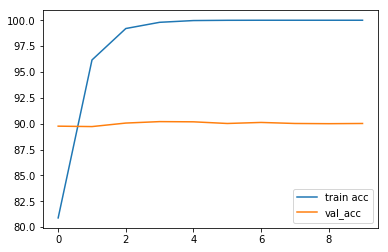

In [2]:
import matplotlib.pyplot as plt
train_acc = [80.89,96.16,99.2,99.8,99.97,99.995,100,100,100,100]
val_acc = [89.76,89.72,90.06,90.2,90.18,90.02,90.12,90.02,90,90.02]
plt.plot(train_acc,label="train acc")
plt.plot(val_acc,label="val_acc")
plt.legend()
plt.show()

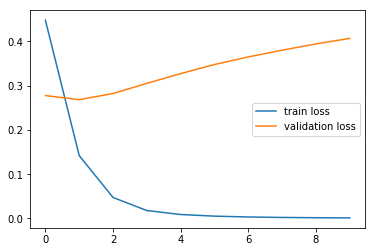

In [315]:
plt.plot(loss_hists['train'],label="train loss")
plt.plot(loss_hists['validate'],label="validation loss")
plt.legend()
plt.show()

In [316]:
import pickle
pickle.dump(loss_hists,open("loss_hist27_t2",'wb'))

In [317]:
class IMDBDataset_test(Dataset):
    def __init__(self, csv_file):
        self.data_frame = csv_file

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
#         print(self.data_frame.iloc[idx].index)
        file_name = self.data_frame.iloc[idx]["file_names"]
        token_idx = self.data_frame.iloc[idx]["token_idized"]
        label = self.data_frame.iloc[idx]['labels']
        return [token_idx, len(token_idx), label,file_name]


def pad_fun_test(batch):
    data_list = []
    label_list = []
    length_list = []
    file_names = []
#     print(batch[0])
    for datum in batch:
        
        label_list.append(datum[2])
        length_list.append(datum[1])
        file_names.append(datum[3])
    for datum in batch:
        if datum[1]>MAX_SENTENCE_LENGTH:
            padded_vec = np.array(datum[0][:MAX_SENTENCE_LENGTH])
        else:
            padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH - datum[1])), 
                                mode="constant", constant_values=0)
#         print(padded_vec.shape)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.from_numpy(np.array(length_list)), torch.from_numpy(np.array(label_list)),np.array(file_names)]

val_dataset_test = IMDBDataset_test(val_df)
val_loader_test = torch.utils.data.DataLoader(dataset = val_dataset_test, 
                                           batch_size = BATCH_SIZE,
                                           collate_fn = pad_fun_test,
                                           shuffle = True)

In [318]:
mod_saved = torch.load("model27_tokenize2")

In [319]:
data, lengths, labels, file_n = next(iter(val_loader_test))
data_batch, length_batch, label_batch = data.cuda(), lengths.cuda(), labels.cuda()
outputs = mod_saved(data_batch, length_batch)
outputs = F.softmax(model(data_batch, length_batch), dim=1)
predicted = outputs.max(1, keepdim=True)[1]
mask =(predicted.squeeze(1).eq(label_batch)).cpu().data.numpy()==0
fns = file_n[mask]
actual_out = labels.data.numpy()[mask]
pred_false = predicted.cpu().data.numpy()[mask]

In [320]:
for i in range(len(fns)):
    print("predicted",pred_false[i][0])
    print("Actual",actual_out[i])
    print(val_df[val_df['file_names'] ==fns[i]]["file_names"].values[0])
    f = open(val_df[val_df['file_names'] ==fns[i]]["file_names"].values[0])
    print(f.read())
    print()
    print("-"*100)

predicted 0
Actual 1
/home/cvh255/nlp_hw1/aclImdb/train/pos/3799_8.txt
When you start watching this animation-masterpiece, you quickly notice, that it's a European production. Although the Europeans have (sadly) integrated some of the clichés you would normally find in an American production of this kind, most are missing. One of these is that there is an overwhelming evil that only our (very few and very unlikely) heroes can vanquish. Another is that one of the group is only in the business for the money, is greedy, runs away when the heat is up but somehow gives in to his better nature. This movie would have been better off without both.<br /><br />The movie is based upon a TV-Series that was out four years before the movie. Unlike the movie, the TV-Series is a cartoon and not a computer animation. At first I thought the computer would kill the charm and character of the plot but I was quickliy convinced: Whoever did the animation knew his or her stuff! Although the characters are ob